In [326]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from glob import glob
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [247]:
labels_csv = pd.read_csv('D:\\Study\\Summer_2024\\AIL303m\\mini_project\\dataset\\labels.csv')
labels_csv.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [248]:
labels_dict = {labels_csv.iloc[i]["ClassId"]:labels_csv.iloc[i]["Name"] for i in range(len(labels_csv))}
labels_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [249]:
image_paths = []
y = []

for class_path in glob("D:\\Study\\Summer_2024\\AIL303m\\mini_project\\dataset\\myData\\*"):
    
    cpath_replaced = class_path.replace("D:\\Study\\Summer_2024\\AIL303m\\mini_project\\dataset\\myData\\","")
    i = int(cpath_replaced.split("\\")[0])
    
    for image_path in glob(class_path + "\\*"):
        image_paths.append(image_path)
        y.append(i)

In [250]:
print("There are {} classes in the dataset".format(len(set(y))))

There are 43 classes in the dataset


In [251]:
IMAGE_SIZE = (32,32)
# Our dataset is already resized so resize parameter's value is false default.
def read_image(img_path,resize=False):
    img = Image.open(img_path)
    
    if resize:
        img.resize(IMAGE_SIZE)
    
    return np.asarray(img)

In [252]:
sample_image = read_image("D:\\Study\\Summer_2024\\AIL303m\\mini_project\\dataset\\myData\\0\\00000_00015 - Copie.jpg")
sample_image.shape

(32, 32, 3)

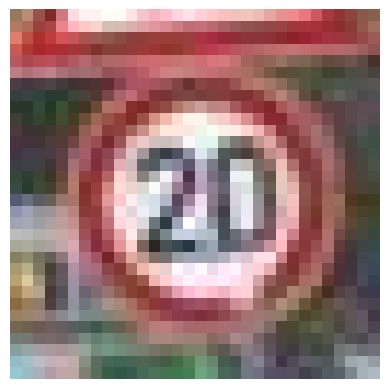

In [253]:
plt.imshow(sample_image)
plt.axis("off")
plt.show()

In [254]:
x = np.asarray([read_image(image_path) for image_path in image_paths])
x.shape

(73139, 32, 32, 3)

In [255]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [256]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [257]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(54854, 32, 32, 3)
(54854,)
(18285, 32, 32, 3)
(18285,)


In [258]:
# Trích xuất đặc trưng HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_feature = hog(image[:, :, 0], orientations=8, pixels_per_cell=(4, 4),
                          cells_per_block=(1, 1), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

x_train_fd = extract_hog_features(x_train)
x_test_fd = extract_hog_features(x_test)

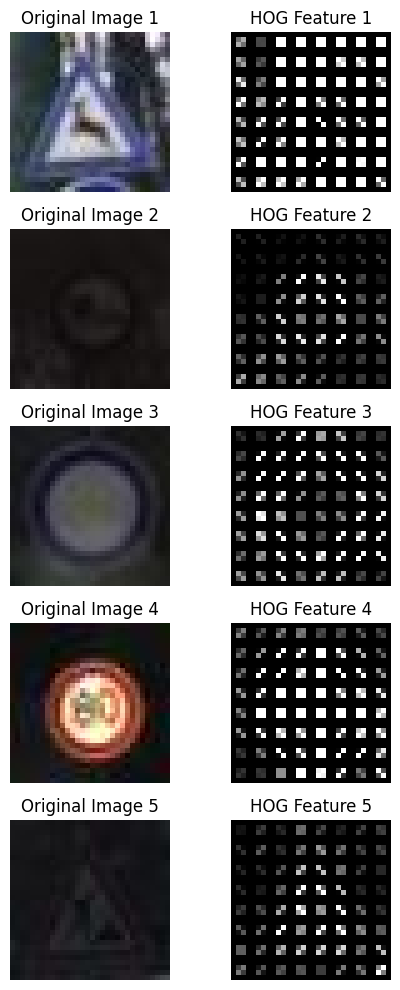

In [329]:
def visualize_hog_features(images, num_images=5):
    fig, axes = plt.subplots(num_images, 2, figsize=(5, 10))
    axes = axes.ravel()

    for i in range(num_images):
        image = images[i]
        hog_feature, hog_image = hog(image[:, :, 0], orientations=8, pixels_per_cell=(4, 4),
                                     cells_per_block=(1, 1), visualize=True)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        axes[2 * i].imshow(image, cmap=plt.cm.gray)
        axes[2 * i].set_title(f"Original Image {i+1}")
        axes[2 * i].axis('off')

        axes[2 * i + 1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
        axes[2 * i + 1].set_title(f"HOG Feature {i+1}")
        axes[2 * i + 1].axis('off')

    plt.tight_layout()
    plt.show()
visualize_hog_features(x_train)

In [259]:
print(x_train_fd.shape)
print(x_test_fd.shape)

(54854, 512)
(18285, 512)


In [260]:
svm = SVC()
svm.fit(x_train_fd,y_train)

SVC()

In [261]:
y_pred = svm.predict(x_test_fd)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       109
           1       0.88      0.92      0.90      1229
           2       0.81      0.76      0.78       667
           3       0.92      0.87      0.90       671
           4       0.95      0.94      0.94       927
           5       0.80      0.87      0.83       876
           6       1.00      1.00      1.00       192
           7       0.90      0.88      0.89       686
           8       0.88      0.88      0.88       693
           9       0.98      0.98      0.98       687
          10       0.96      0.98      0.97       955
          11       0.93      0.98      0.96       599
          12       0.99      1.00      0.99       988
          13       1.00      1.00      1.00      1016
          14       1.00      0.97      0.98       400
          15       0.99      0.94      0.96       276
          16       1.00      1.00      1.00       185
          17       1.00    

In [262]:
knn = KNeighborsClassifier()
knn.fit(x_train_fd, y_train)

KNeighborsClassifier()

In [263]:
y_pred = knn.predict(x_test_fd)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       109
           1       0.84      0.96      0.89      1229
           2       0.80      0.79      0.80       667
           3       0.87      0.82      0.85       671
           4       0.82      0.91      0.86       927
           5       0.78      0.81      0.80       876
           6       0.99      0.99      0.99       192
           7       0.80      0.80      0.80       686
           8       0.85      0.82      0.83       693
           9       0.97      0.96      0.96       687
          10       0.94      0.90      0.92       955
          11       0.91      0.97      0.94       599
          12       0.99      0.99      0.99       988
          13       1.00      1.00      1.00      1016
          14       0.99      0.96      0.97       400
          15       0.97      0.86      0.91       276
          16       0.98      0.99      0.99       185
          17       1.00    

In [330]:
# Hàm nhận diện biển báo giao thông từ một ảnh bên ngoài
def detect_and_classify_traffic_sign(image_path, model, labels_dict, pixels_per_cell=(4, 4), cells_per_block=(1, 1)):
    # Đọc và xử lý ảnh đầu vào
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image at path:", image_path)
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Phát hiện đối tượng trong ảnh
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Nếu không tìm thấy contour nào thì báo lỗi
    if len(contours) == 0:
        print("No contours found in the image.")
        return

    # Lấy contour lớn nhất
    contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contour)
    bounding_box = gray_image[y:y+h, x:x+w]

    # Resize bounding box và trích xuất đặc trưng HOG
    resized_box = cv2.resize(bounding_box, IMAGE_SIZE)
    hog_features = hog(resized_box, orientations=8, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False)

    # Dự đoán nhãn sử dụng mô hình đã huấn luyện
    prediction = model.predict([hog_features])[0]
    label = labels_dict.get(prediction, "Unknown")

    # Tính toán kích thước font chữ phù hợp với bounding box
    font_scale = 0.5  # Bắt đầu với một giá trị nhỏ
    font_thickness = 1
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    
    while text_width < w and text_height < h / 2:  # Đảm bảo text nằm trong bounding box và chiếm không quá nửa chiều cao
        font_scale += 0.1
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    
    # Giảm một chút để đảm bảo text nằm hoàn toàn trong bounding box
    font_scale -= 0.1

    # Vẽ bounding box và nhãn lên ảnh
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)
    
    # Hiển thị kết quả
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Traffic Sign')
    plt.axis('off')
    plt.show()

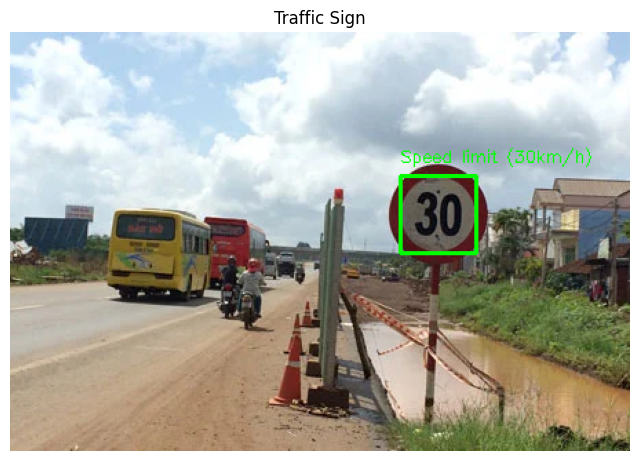

In [341]:
# Sử dụng mô hình tốt nhất để nhận diện ảnh bên ngoài
external_image_path = "D:\Study\Summer_2024\AIL303m\mini_project\da-thao-do-bien-han-che-toc-do-30kmh-o-dau-giay-1.webp"  
detect_and_classify_traffic_sign(external_image_path, knn, labels_dict)